# <span style="color:green"> Laboratorio di simulazione numerica (LSN) </span>
## <span style="color:blue">  Esercitazione numerica 3 </span>

## Moduli
Si importano moduli e librerie utili per il notebook. Inoltre si inizializzano i parametri di matplotlib.

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, exp, sqrt
from scipy.special import erf

%matplotlib inline
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams["legend.loc"] = 'best'

## Esercizio 03.1: <span style="color:brown"> Opzioni di prezzo plain vanilla  </span>
Nel seguito si riportano i risultati per le simulazioni Monte Carlo delle opzioni di prezzo di tipo *plain vanilla* sia nel caso **call** che nel caso **put** (entrambe di tipo Europeo).\
Per le simulazioni sono stati usati $M=10^6$ step Monte Carlo, divisi in $N=100$ blocchi per il eseguire la media a blocchi. Le altre opzioni sono riportate direttamente come variabili nello specchietto seguente, utilizzato per calcolare le soluzioni analitiche (*Black-Scholes*).\
Entrambe le opzioni sono state calcolate sia campionando direttamente il prezzo finale che sia discretizzandolo utilizzando il moto browniano geometrico (GBR) in $100$ intervalli temporali.

## Soluzioni analitiche di Black-Scholes

In [2]:
#options
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t = 0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


## Risultati per il calcolo Monte Carlo
Vengono riportati i risultati delle simulazioni, per entrambe le opzioni di prezzo, e vengono confrontati il calcolo diretto e quello discretizzato.

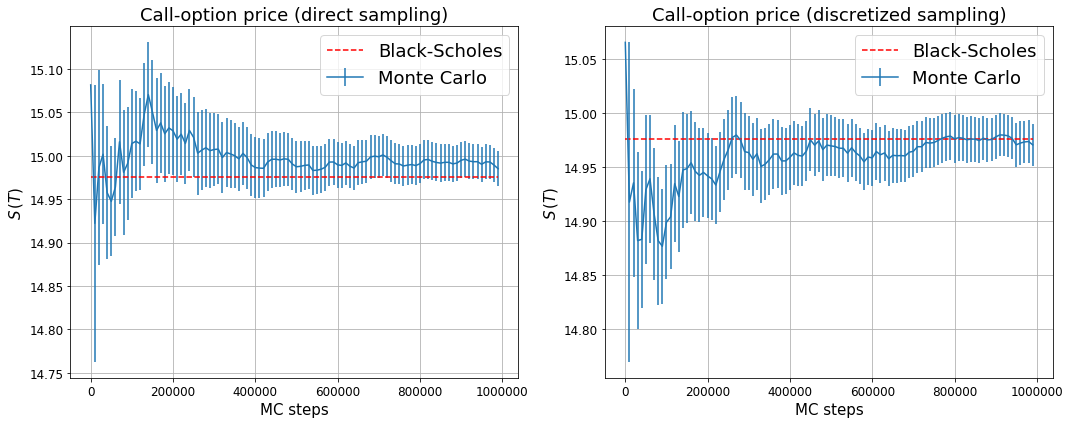

In [24]:
#call
N_dr, call_dr, err_call_dr = np.loadtxt('call_direct.dat', dtype=float, unpack='true')
N_ds, call_ds, err_call_ds = np.loadtxt('call_discretized.dat', dtype=float, unpack='true')
L = 10000 #number of steps per block

N_dr *= L
N_ds *= L

fig, axx = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
ax_dr = axx[0]
ax_ds = axx[1]

ax_dr.set_title(f"Call-option price (direct sampling)", size=18)
ax_dr.errorbar(N_dr, call_dr, yerr=err_call_dr, label='Monte Carlo')
ax_dr.hlines(y=call, xmin=0, xmax=N_dr[-1], linestyles='dashed', color='red', label='Black-Scholes')
ax_dr.set_xlabel(r'MC steps', size=15)
ax_dr.set_ylabel(f'$S\,(T)$', size=15)
ax_dr.legend(fontsize=18)
ax_dr.grid(True)

ax_ds.set_title(f"Call-option price (discretized sampling)", size=18)
ax_ds.errorbar(N_ds, call_ds, yerr=err_call_ds, label='Monte Carlo')
ax_ds.hlines(y=call, xmin=0, xmax=N_ds[-1], linestyles='dashed', color='red', label='Black-Scholes')
ax_ds.set_xlabel(r'MC steps', size=15)
ax_ds.set_ylabel(f'$S\,(T)$', size=15)
ax_ds.legend(fontsize=18)
ax_ds.grid(True)

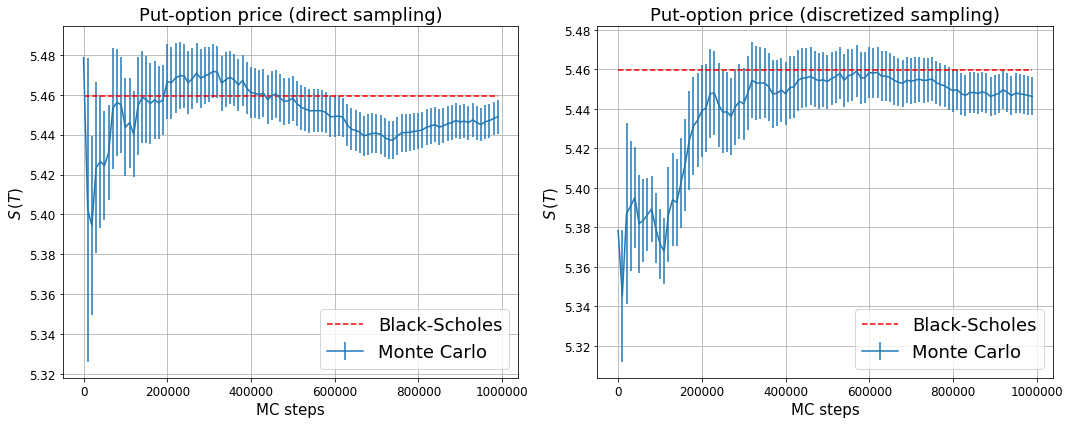

In [23]:
#put
N_dr, put_dr, err_put_dr = np.loadtxt('put_direct.dat', dtype=float, unpack='true')
N_ds, put_ds, err_put_ds = np.loadtxt('put_discretized.dat', dtype=float, unpack='true')

N_dr *= L
N_ds *= L

fig, axx = plt.subplots(1, 2, figsize=(15, 6), tight_layout=True)
ax_dr = axx[0]
ax_ds = axx[1]

ax_dr.set_title(f"Put-option price (direct sampling)", size=18)
ax_dr.errorbar(N_dr, put_dr, yerr=err_put_dr, label='Monte Carlo')
ax_dr.hlines(y=put, xmin=0, xmax=N_dr[-1], linestyles='dashed', color='red', label='Black-Scholes')
ax_dr.set_xlabel(r'MC steps', size=15)
ax_dr.set_ylabel(f'$S\,(T)$', size=15)
ax_dr.legend(loc='lower right', fontsize=18)
ax_dr.grid(True)

ax_ds.set_title(f"Put-option price (discretized sampling)", size=18)
ax_ds.errorbar(N_ds, put_ds, yerr=err_put_ds, label='Monte Carlo')
ax_ds.hlines(y=put, xmin=0, xmax=N_dr[-1], linestyles='dashed', color='red', label='Black-Scholes')
ax_ds.set_xlabel(r'MC steps', size=15)
ax_ds.set_ylabel(f'$S\,(T)$', size=15)
ax_ds.legend(loc='lower right', fontsize=18)
ax_ds.grid(True)

## Confronto
Si riportano i confronti tra i risultati per $S\,(T)$ ricavati dalle soluzioni analitiche di *Black-Scholes* e quelli ricavati dalle simulazioni Monte Carlo, sia per il calcolo diretto che per il calcolo con la discretizzazione.

In [19]:
call_dr_val = call_dr[-1]
call_ds_val = call_ds[-1]
put_dr_val = put_dr[-1]
put_ds_val = put_ds[-1]
call_dr_err = err_call_dr[-1]
call_ds_err = err_call_ds[-1]
put_dr_err = err_put_dr[-1]
put_ds_err = err_put_ds[-1]

print('Call option (direct final asset price):', round(call_dr_val, 2), '\u00B1', round(call_dr_err, 2))
print('Call option (discretized path to final asset price):', round(call_ds_val, 2), '\u00B1', round(call_ds_err, 2))
print('Put option (direct final asset price):', round(put_dr_val, 3), '\u00B1', round(put_dr_err, 3))
print('Put option (discretized path to final asset price):', round(put_ds_val, 2), '\u00B1', round(put_ds_err, 3))

Call option (direct final asset price): 14.99 ± 0.02
Call option (discretized path to final asset price): 14.97 ± 0.02
Put option (direct final asset price): 5.449 ± 0.008
Put option (discretized path to final asset price): 5.45 ± 0.01


In [17]:
comparison_call_dr = np.abs(call - call_dr_val)/call_dr_err
comparison_call_ds = np.abs(call - call_ds_val)/call_ds_err
comparison_put_dr = np.abs(put - put_dr_val)/put_dr_err
comparison_put_ds = np.abs(put - put_ds_val)/put_ds_err

print('Comparison between Black-Scholes analytic solutions and simulated results:')
print('Call (direct):', round(comparison_call_dr, 2))
print('Call (discretized):', round(comparison_call_ds, 2))
print('Put (direct):', round(comparison_put_dr, 2))
print('Put (discretized):', round(comparison_put_ds, 2))

Comparison between Black-Scholes analytic solutions and simulated results:
Call (direct): 0.46
Call (discretized): 0.26
Put (direct): 1.25
Put (discretized): 1.38


Si nota che tutti i risultati sono compatibili con le soluzioni analitiche di Black-Scholes. Tuttavia si vede anche come le soluzioni ottenute per le *put* siano di poco fuori da una deviazione standard, anche se qusta non è una differenza significativa.